In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
def show_compare(img1, title1, img2, title2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(img1, cmap='gray'), plt.title(title1)
    plt.subplot(1, 2, 2), plt.imshow(img2, cmap='gray'), plt.title(title2)
    plt.show()

img = cv2.imread('./images/cat.jpg', 0).astype(np.float32)
img_2 = cv2.imread('./images/cat2.jpg', 0).astype(np.float32)
img_3 = cv2.imread('./images/dog.png', 0).astype(np.float32)


k_size = 5 # On crée un carré blanc de 5x5. Plus il est grand, plus l'effet est fort.
structuring_element = np.ones((k_size, k_size), dtype=np.float32)

Test Exercice 1 : Dilatation


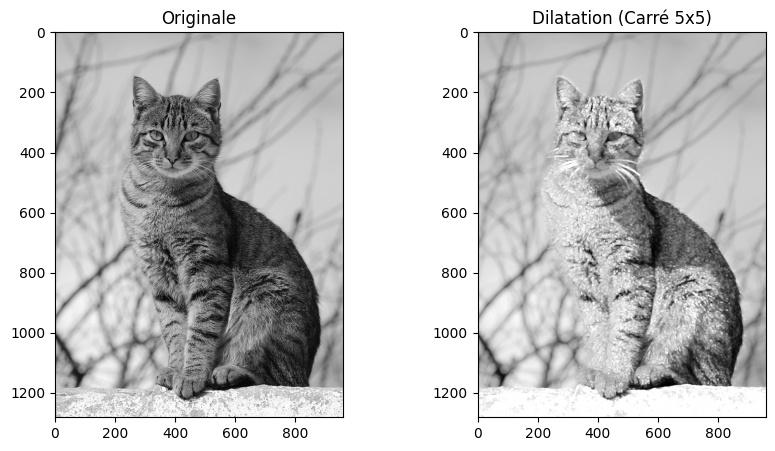

In [ ]:
def dilate(image, structuringElement):
    """
    Compute the dilation of the input float image by the given structuring element.
    Pixel outside the image are supposed to have value 0.
    """
    h, w = image.shape
    h_se, w_se = structuringElement.shape

    res = np.zeros((h, w), dtype=np.float32)

    pad_h = h_se // 2
    pad_w = w_se // 2

    image_padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    for i in range(h):
        for j in range(w):
            # Dans l'image paddée, le pixel (i,j) est décalé de (pad_h, pad_w).
            roi = image_padded[i : i + h_se, j : j + w_se]
            
            # maximum des valeurs des pixels couverts par l'élément structurant actif (=1).
            pixels_concernes = roi[structuringElement > 0]
            
            # on prend le maximum (si pas vide) ou 0 sinon
            if pixels_concernes.size > 0:
                res[i, j] = np.max(pixels_concernes)
            else:
                res[i, j] = 0.0
    return res

print("Test Exercice 1 : Dilatation")
res_dilate = dilate(img, structuring_element)
show_compare(img, "Originale", res_dilate, f"Dilatation (Carré {k_size}x{k_size})")

Test Exercice 2 : Érosion


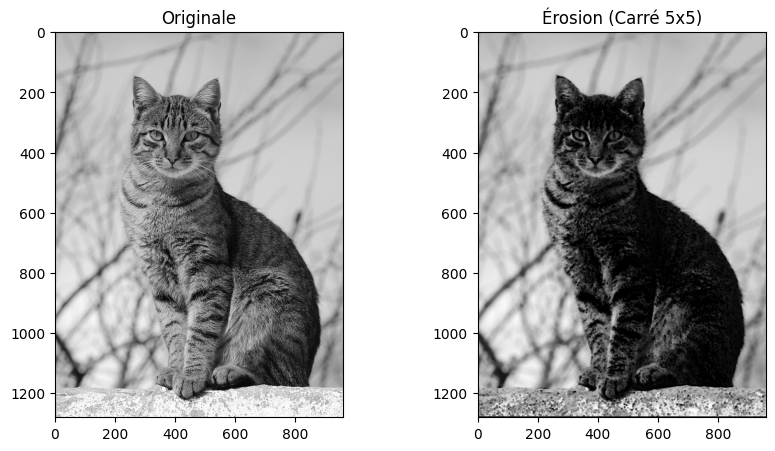

In [ ]:
def erode(image, structuringElement):
    """
    Compute the erosion of the input float image by the given structuring element.
    Pixel outside the image are supposed to have value 1.
    """
    res = 1.0 - dilate(1.0 - image, structuringElement) # l'inversion (1.0 - image) transforme les zones sombres en zones claires et vice-versa.
    return res

print("Test Exercice 2 : Érosion")
res_erode = erode(img, structuring_element)
show_compare(img, "Originale", res_erode, f"Érosion (Carré {k_size}x{k_size})")

Test Exercice 3 : Fermeture


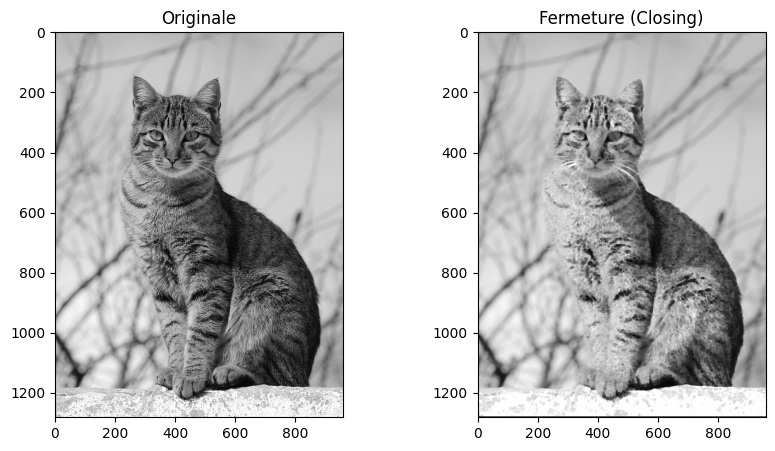

In [ ]:
def close_morphology(image, structuringElement):
    """
    Compute the closing of the input float image by the given structuring element.
    """
    res = erode(dilate(image, structuringElement), structuringElement) # On applique l'érosion sur le résultat de la dilatation.
    return res

print("Test Exercice 3 : Fermeture")
res_close = close_morphology(img, structuring_element)
show_compare(img, "Originale", res_close, "Fermeture (Closing)")

Test Exercice 4 : Ouverture (Opening)


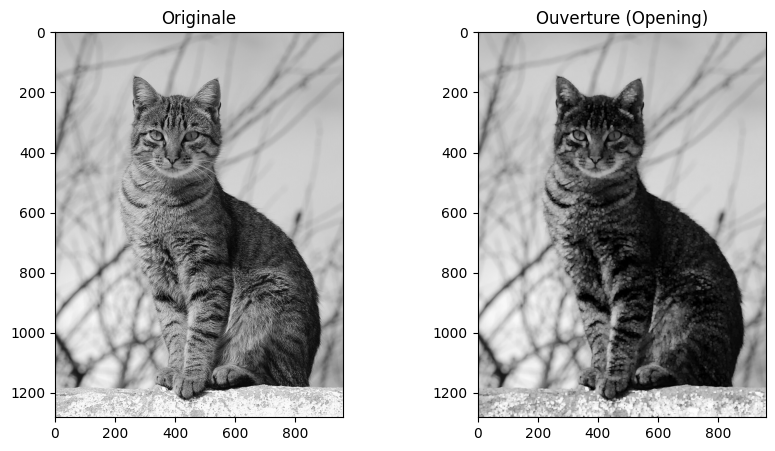

In [ ]:
def open_morphology(image, structuringElement):
    """
    Compute the opening of the input float image by the given structuring element.
    """
    res = dilate(erode(image, structuringElement), structuringElement) # On applique la dilatation sur le résultat de l'érosion.
    return res

print("Test Exercice 4 : Ouverture (Opening)")
res_open = open_morphology(img, structuring_element)
show_compare(img, "Originale", res_open, "Ouverture (Opening)")

Test Exercice 5 : Gradient Morphologique


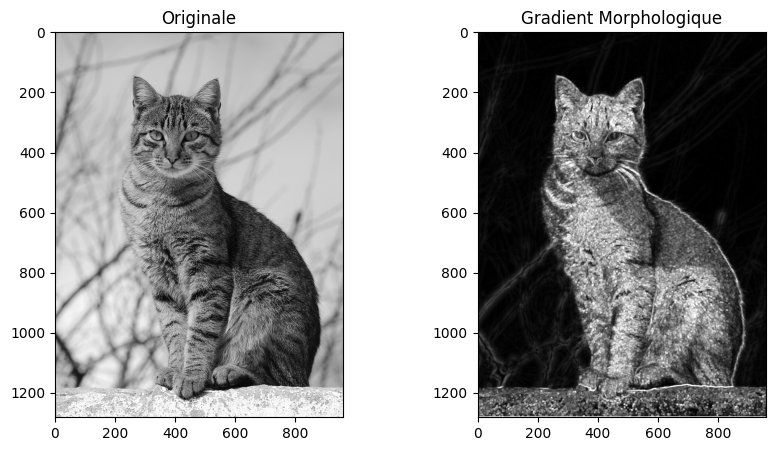

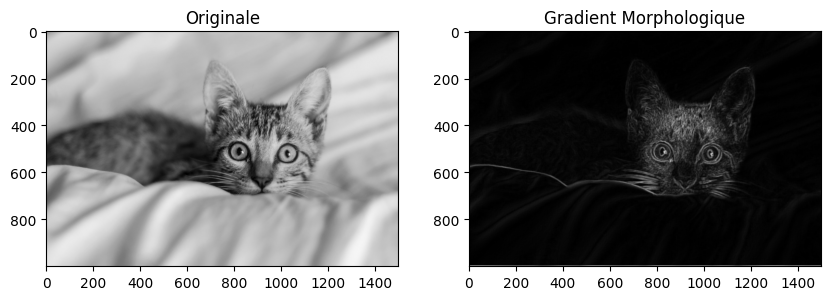

In [15]:
def morphologicalGradient(image, structuringElement):
    """
    Compute the morphological gradient of the input float image by the given structuring element.
    """
    res = dilate(image, structuringElement) - erode(image, structuringElement) # Le gradient morphologique est défini par la différence entre la dilatation et l'érosion de l'image.
    return res

print("Test Exercice 5 : Gradient Morphologique")
res_grad = morphologicalGradient(img, structuring_element)
show_compare(img, "Originale", res_grad, "Gradient Morphologique")
res_grad2 = morphologicalGradient(img_2, structuring_element)
show_compare(img_2, "Originale", res_grad2, "Gradient Morphologique")